In [1]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

In [2]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.mixture import GaussianMixture
from sklearn.preprocessing import StandardScaler

In [3]:
data_ori = pd.read_csv("EM/heros.csv",encoding='gb18030')
features = [u'最大生命',u'生命成长',u'初始生命',u'最大法力', u'法力成长',u'初始法力',u'最高物攻',u'物攻成长',u'初始物攻',u'最大物防',u'物防成长',u'初始物防', u'最大每5秒回血', u'每5秒回血成长', u'初始每5秒回血', u'最大每5秒回蓝', u'每5秒回蓝成长', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features]

In [4]:
# 可视化
# 中文标签显示
plt.rcParams['font.sans-serif']=['SimHei']
plt.rcParams['axes.unicode_minus']=False

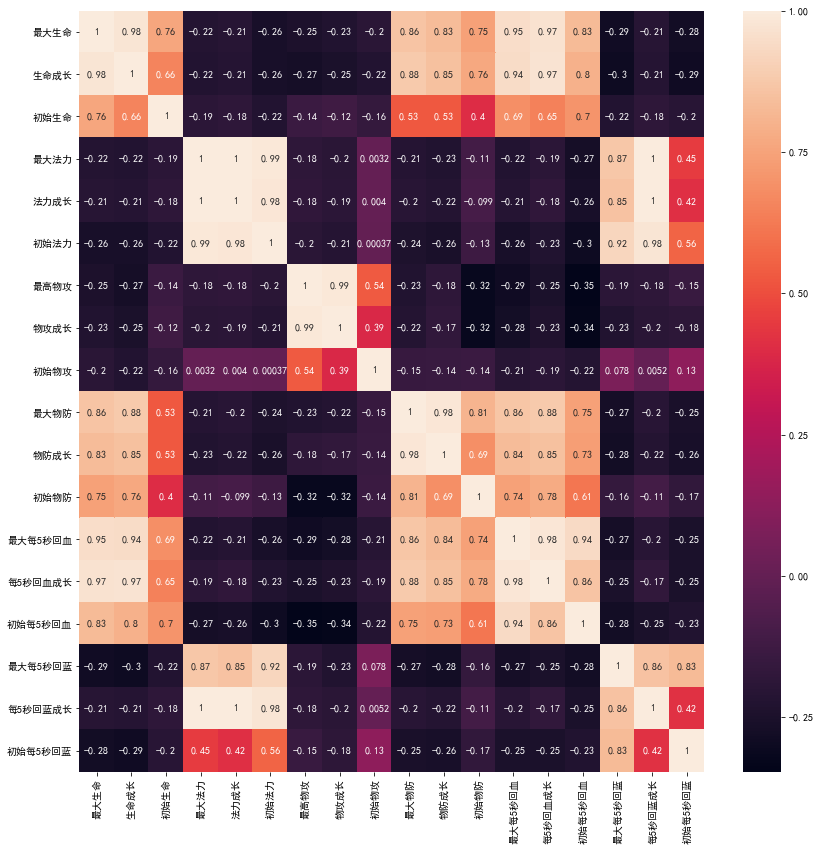

In [5]:
# 热力图
corr = data[features].corr()
plt.figure(figsize=(14,14))
sns.heatmap(corr,annot=True)
plt.show()

In [6]:
features_remain = [u'最大生命', u'初始生命', u'最大法力', u'最高物攻', u'初始物攻', u'最大物防', u'初始物防', u'最大每5秒回血', 
                   u'最大每5秒回蓝', u'初始每5秒回蓝', u'最大攻速', u'攻击范围']
data = data_ori[features_remain]
data[u'最大攻速'] = data[u'最大攻速'].apply(lambda x: float(x.strip('%'))/100)
data[u'攻击范围'] = data[u'攻击范围'].map({'远程':1,'近战':0})
ss = StandardScaler()
data = ss.fit_transform(data)
gmm = GaussianMixture(n_components=30,covariance_type='full')
gmm.fit(data)

#训练数据
prediction = gmm.predict(data)
print(prediction)

data_ori.insert(0,'分组',prediction)
data_ori.to_csv("EM/hero_out.csv",index=False,sep=',')


[10 23  8  6  7  7  5  8  6 23  3 20  6 25 24  3 19  6  7  4 18 12  4 12
 12 12  4 15 22 26 25  1  1 22 26  1 22  0 28 14 14 22 22  1 22 14 20 28
 23 22 17 29 11 13 13 10 10  2 21  7 10 11  9 10 16 29 29 27 15]


D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
D:\Python\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [8]:
# 聚类结果的评估方法
from sklearn.metrics import calinski_harabaz_score
print(calinski_harabaz_score(data,prediction))

21.722971183546903
